In [2]:
#In The Name Of 0111

In [3]:
#Importing Dependencies

In [4]:
from random import randint as rnd
from random import shuffle
import matplotlib.pyplot as plt

In [5]:
#Se#tting the problem and algorithm paramiters

In [26]:
N = 10
PS = 100  # Population Size
MR = 0.8 # Mutation Rate
EPOCH = 200

In [7]:
#Initial population function

In [8]:
def init_population(n,ps):
    population_list = []
    for i in range(ps):
        member = []
        for j in range(n):
            member.append(rnd(0,n-1))
        population_list.append(member+[None])
    return population_list

In [9]:
#Cross-Over function

In [10]:
def cross_over(population_list, n, ps):
    for i in range(0, ps, 2):
        child1 = population_list[i][:n//2]+population_list[i+1][n//2:n]+[None]
        child2 = population_list[i+1][:n//2]+population_list[i][n//2:n]+[None]
        population_list.append(child1)
        population_list.append(child2)
    return population_list

In [11]:
#Mutaion function

In [12]:
def mutation(population_list, n, ps, mr):
    chooosen_ones = list(range(ps,ps*2))
    shuffle (chooosen_ones)
    chooosen_ones = chooosen_ones[:int(ps*mr)]

    for i in chooosen_ones:
        cell = rnd(0, n-1)
        val = rnd(0, n-1)
        population_list[i][cell] = val
    return population_list


In [13]:
#Fitness function

In [19]:
def fittness(population_list, n):
    lenth =len(population_list)
    for i in range(lenth):
        confilict = 0
       
        for j in range(n):
            for k in range(j+1,n):
                
                # column
                if population_list[i][j]==population_list[i][k]:
                    confilict+=1
                
                #diagnol
                if abs(j-k)==abs(population_list[i][j]-population_list[i][k]):
                    confilict+=1   

                    
        population_list[i][-1]=confilict
    return population_list

In [20]:
#Prsentation function

In [21]:
def show(solution, n):
    plt.figure(figsize=(5,5))
    for i in range(n+1):
        plt.plot([0, n*2], [i*2, i*2], color='black')
        plt.plot([i*2, i*2], [0, n*2], color='black')

    for i in range(n):
        plt.scatter([i*2+1], [solution[i]*2+1], color='red')

    plt.show()

In [22]:
#Main

1 Best solution so far: [7, 4, 0, 3, 6, 4, 7, 1, 2]
2 Best solution so far: [3, 1, 7, 2, 0, 6, 4, 1, 1]
3 Best solution so far: [3, 1, 7, 2, 0, 6, 4, 1, 1]
4 Best solution so far: [3, 1, 7, 2, 0, 6, 4, 1, 1]
5 Best solution so far: [3, 1, 7, 2, 0, 6, 4, 1, 1]
6 Best solution so far: [3, 1, 7, 2, 0, 6, 4, 1, 1]
7 Best solution so far: [3, 1, 7, 2, 0, 6, 4, 1, 1]
8 Best solution so far: [3, 1, 7, 2, 0, 6, 4, 1, 1]
9 Best solution so far: [3, 1, 7, 2, 0, 6, 4, 1, 1]
10 Best solution so far: [3, 1, 7, 2, 0, 6, 4, 1, 1]
11 Best solution so far: [3, 1, 7, 2, 0, 6, 4, 1, 1]
12 Best solution so far: [3, 1, 7, 2, 0, 6, 4, 1, 1]
13 Best solution so far: [3, 1, 7, 2, 0, 6, 4, 1, 1]
14 Solution Found: [3, 5, 7, 2, 0, 6, 4, 1, 0]


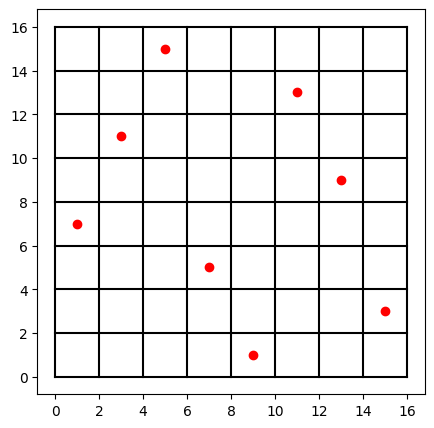

In [25]:
current_population = init_population(N,PS)
current_population = fittness(current_population,N )
current_population = sorted(current_population, key=lambda x:x[-1])
if current_population[0][-1]==0:
        print("Solution was found in the initial population stage:" ,current_population[0] )
        show(current_population[0],N)
else:
    for i in range(EPOCH):
        current_population = cross_over(current_population, N, PS)
        current_population = mutation(current_population, N, PS, MR)
        current_population = fittness(current_population,N )
        current_population = sorted(current_population, key=lambda x:x[-1])
        current_population = current_population[:PS]
        if current_population[0][-1]==0:
            print(i+1,"Solution Found:" ,current_population[0] )
            show(current_population[0],N)
            break
        else:
            print(i+1,"Best solution so far:" ,current_population[0] )


    else:
        print("Sorry, we could not find you a solution")
        show(current_population[0],N)        